# <p style="text-align: center;"> Greatness. Safety. Youth. </p>
    
## <b>A</b>

## <b>R</b>eally

## <b>S</b>olid

## <b>O</b>rganization for

## <b>N</b>eighboorhoods

In [32]:
#Imports
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

#Read data from csv files
fireIncidents = pd.read_csv("Fire Incidents.csv")
playgrounds = pd.read_csv("Playgrounds.csv")

#Sort out fire incidents : must contain trash or rubbish
fireIncidents = fireIncidents.iloc[:,[2,8,16,17]]
fireIncidents = fireIncidents.dropna()
mask = (fireIncidents["type_description"].str.lower().str.find("trash") > -1) | (fireIncidents["type_description"].str.lower().str.find("rubbish") > -1) 
fireIncidents = fireIncidents[mask]

**Introduction** 

The metric we are using is the highest average distance between playgrounds and trash fires.
We used a dataset containing all fire incidents in Pittsburgh, and a dataset containing the location of all playgrounds in Pittsburgh.



In [29]:
#Setup variables
distances = dict() #key: town name    value(float): average distance

    
#Get 'Total' distances of all playgrounds in each neighborhood from the nearest trash fire.
for x in range(0,len(playgrounds)):
    dist = 0
    for y in range(0,len(fireIncidents)):
        
        xDistance = (float(playgrounds.iloc[x].iloc[16])-float(fireIncidents.iloc[y].iloc[3])) * (math.cos(math.radians(playgrounds.iloc[x].iloc[15]))*69.172) #convert longitude to miles
        yDistance = (float(playgrounds.iloc[x].iloc[15])-float(fireIncidents.iloc[y].iloc[2])) * 68.99 #convert latitude to miles
        newDist = math.sqrt(xDistance**2 + yDistance**2)
        if(newDist<dist or dist==0):
            dist = newDist
    
    #if playgrounds.iloc[x].loc['neighborhood'] == "Regent Square":
        
    
    try:     #if distance measure already exists
        distances[playgrounds.iloc[x].iloc[7]] += dist
    except: #if distance measure doesn't exist, set it equal to the new distance found.
        distances[playgrounds.iloc[x].iloc[7]] = dist

#Divide total distance of trash fires by number of playgrounds in each district.
keyArray = list(distances)
for key in keyArray:
    distances[key] /= len(playgrounds.loc[playgrounds['neighborhood'] == key])
    
print("Calculations complete.")

1371
Calculations complete.


In [30]:
#Sort values in dictionary by converting them to a list of tuples.
list_tuples = sorted(distances.items(), key=lambda x: x[1], reverse = True)  #Based on code from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
for i in range(0,len(list_tuples)):
    if i < 5 or i >= len(list_tuples)-5:
        print(list_tuples[i])
    elif i == len(list_tuples)-6:
        print('.')
    else:
        print('.', end='')

#graph list_tuples

('East Carnegie', 0.7840054803758706)
('Duquesne Heights', 0.38160175547311714)
('Upper Lawrenceville', 0.3206432370933507)
('Westwood', 0.2772101598732847)
('Banksville', 0.2395215864733635)
.........................................................
('Strip District', 0.03034541150151429)
('Central Lawrenceville', 0.02994060057693434)
('Homewood West', 0.02556618344897038)
('Troy Hill', 0.0218898752752254)
('Spring Garden', 0.020281904627722995)


The sorted data tells us that **East Carnegie** is the best neighborhood, while **Spring Garden** is the worst, with an average of 107 feet from any playground to the location of a trash fire.

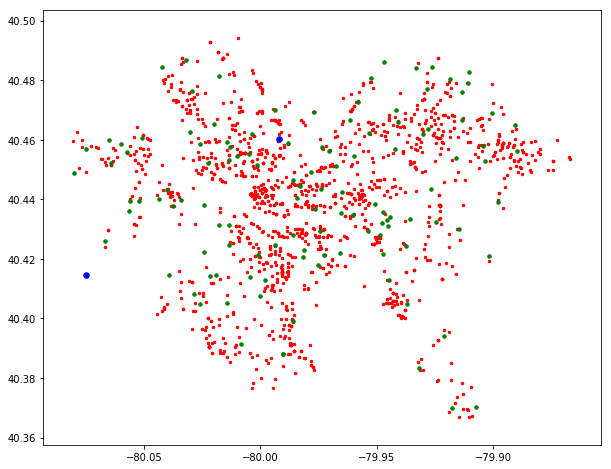

In [35]:
plt.rcParams['figure.figsize'] = [10,8]
plt.scatter(fireIncidents['longitude'], fireIncidents['latitude'], color='red', s=6)
plt.scatter(playgrounds['longitude'], playgrounds['latitude'], color='green', s=12)
eastCarnegie = playgrounds.loc[playgrounds['neighborhood']=='East Carnegie',:]
plt.scatter(eastCarnegie['longitude'], eastCarnegie['latitude'], color='blue', s=30)
springGarden = playgrounds.loc[playgrounds['neighborhood']=='Spring Garden',:]
plt.scatter(springGarden['longitude'], springGarden['latitude'], color='blue', s=30)

Here we can see a map of all the playgrounds and trash fires in Pittsburgh. East Carnegie and Spring Garden each have one playground, both highlighted in blue. Any guess as to which is which?

<BarContainer object of 10 artists>

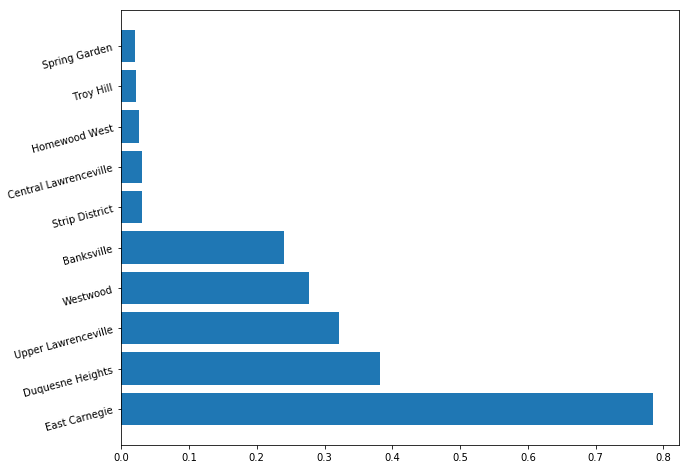

In [85]:
plt.yticks(rotation=15)

lists = list(map(list, zip(*list_tuples)))
plt.barh(lists[0][:5]+lists[0][len(lists[0])-5:], lists[1][:5]+lists[1][len(lists[0])-5:])

Here's a bar graph with the five best and five worst neighboorhoods. East Carnegie has an average of over 3/4 of a mile, compared to Spring Garden's about 1/50 of a mile.